In [11]:
from RF_feature_selection import *
RANDOM_SEED = 137
test_fraction = 0.2
print('Loading and EDA')
df,target,df_info = EDA('train.csv',data_fraction=0.2)
target = np.log1p(target)
param_grid = grid_param_setup()
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size= test_fraction, random_state=RANDOM_SEED)
base_model = RandomForestRegressor(random_state = RANDOM_SEED)
rf_random = random_grid(X_train,y_train,base_model,param_grid,RANDOM_SEED)

Loading and EDA
version 2
param_grid:
{'bootstrap': [True, False],
 'max_depth': [10, 60, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [0, 22, 44, 66, 88, 111, 133, 155, 177, 200]}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


In [12]:
rf_random.best_params_


{'n_estimators': 66,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [13]:
params_ = {'bootstrap': [True, False],
 'max_depth': [50, 60, 70, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2],
 'min_samples_split': [2],
 'n_estimators': [int(x) for x in np.linspace(40, 90, 10)]}

rf_grid = search_grid(X_train,y_train,base_model,params_) 

#compare_result(rf_random,rf_grid,base_model,X_train, X_test, y_train, y_test)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   22.0s finished


In [14]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 73}

In [17]:
best_params_ = {'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 73}
 
rf_best = RandomForestRegressor(bootstrap = False, max_depth = 70, max_features = 'sqrt', 
                                min_samples_leaf = 2, min_samples_split = 2, 
                                n_estimators = 78,
                                n_jobs = -1, random_state = RANDOM_SEED)
rf_best.fit(X_train,y_train)
evaluate(rf_best, X_test, y_test)
features = feature_sel(rf_best,X_train,y_train)

Model Performance
R2 Score: 0.24% degrees.
RMSE = 1.5137
Index(['20aa07010', '87ffda550', '822e49b95', '80b14398e', '251d1aa17',
       '963a49cdc', 'a75d400b8', '68a945b18', 'f99a09543', '63c094ba4',
       ...
       'ea26c7fe6', 'e79e5f72c', 'a396ceeb9', '1d81e197a', '19915a6d3',
       'ef30f6be5', '23310aa6f', 'b1bb8eac3', '8d8bffbae', '5831f4c76'],
      dtype='object', length=274)


In [18]:
tree_grid = {'n_estimators': [int(x) for x in np.linspace(1, 150, 20)]}

# Create the grid search model and fit to the training data
tree_grid_search = GridSearchCV(rf_best, param_grid=tree_grid, verbose = 2, n_jobs=-1, cv = 5,
                                    scoring = 'neg_mean_absolute_error',return_train_score=True)
tree_grid_search.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished


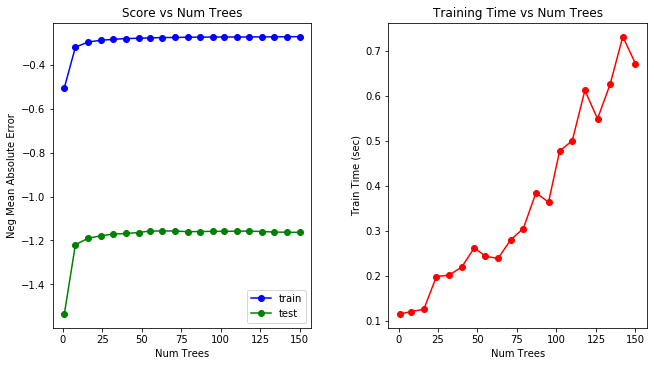

In [19]:
plot_results(tree_grid_search)

In [21]:
best_params_ = {'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 25}
 
rf_best = RandomForestRegressor(bootstrap = False, max_depth = 70, max_features = 'sqrt', 
                                min_samples_leaf = 2, min_samples_split = 2, 
                                n_estimators = 25,
                                n_jobs = -1, random_state = RANDOM_SEED)
rf_best.fit(X_train,y_train)
evaluate(rf_best, X_test, y_test)
features = feature_sel(rf_best,X_train,y_train)

Model Performance
R2 Score: 0.23% degrees.
RMSE = 1.5203
Index(['20aa07010', '87ffda550', '822e49b95', '80b14398e', 'f115e74c0',
       '251d1aa17', '963a49cdc', 'a75d400b8', 'beb7f98fd', '63c094ba4',
       ...
       '1f8754c4e', '19915a6d3', 'ef30f6be5', '6df033973', '23310aa6f',
       'b1bb8eac3', 'cdfc2b069', '8d8bffbae', '3ecc09859', '8675bec0b'],
      dtype='object', length=282)


In [51]:
data = pd.read_csv('train.csv')
df = data.drop(['ID','target'],axis =1 )
target = np.log1p(data['target'])
df_train = df[features]
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.2, random_state=RANDOM_SEED)
base_model = GradientBoostingRegressor(random_state = RANDOM_SEED)
base_model.fit(X_train,y_train)
evaluate(base_model,X_test,y_test)

Model Performance
R2 Score: 0.27% degrees.
RMSE = 1.4575


(0.26527112668633124, 1.457484299487074)

In [35]:
params_ = {'max_depth': [50, 60, 70, None],
 'max_features': ['sqrt','auto'],
 'min_samples_leaf': [5,50,100],
 'min_samples_split': [5,50,100],
 'n_estimators': [int(x) for x in np.linspace(10, 200, 10)]}
#base_model = GradientBoostingRegressor(learning_rate=0.1,subsample=0.8,random_state=RANDOM_SEED)
gb_random = random_grid(X_train,y_train,base_model,params_,RANDOM_SEED)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.0min finished


In [36]:
gb_random.best_params_

{'n_estimators': 136,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 70}

In [43]:
params_ = {'max_depth': [70, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2,5],
 'min_samples_split': [2,5],
 'n_estimators':[int(x) for x in np.linspace(50,200, 5)]}
gb_grid = search_grid(X_train,y_train,base_model,params_) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.1min finished


In [47]:
gb_grid.best_params_

{'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 50}

In [52]:
grid_best = GradientBoostingRegressor(learning_rate=.1,n_estimators=50,
                          min_samples_split=2,min_samples_leaf=5,max_features='sqrt',
                          max_depth = None,random_state=RANDOM_SEED)
grid_best.fit(X_train,y_train)
evaluate(grid_best,X_test,y_test)

Model Performance
R2 Score: 0.31% degrees.
RMSE = 1.4108


(0.31161755995122375, 1.410766775705093)

1.80% repeat sampling the test set, plot the result 
2.Change the depth up to 10
3.try to combine different models 

In [53]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict


In [62]:
df,target,df_info = EDA('train.csv',data_fraction=0.2)
target = np.log1p(target)
import warnings
warnings.filterwarnings('ignore')
scores = defaultdict(list)
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
for train_idx, test_idx in rs.split(df):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df.iloc[train_idx,:], df.iloc[test_idx,:]
    Y_train, Y_test = target.iloc[train_idx], target.iloc[test_idx]
    r = rf_best.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf_best.predict(X_test))
    for col in df.columns:
        X_t = X_test.copy() 
        #print(col)
        np.random.shuffle(X_t.loc[:,col])
        shuff_acc = r2_score(Y_test, rf_best.predict(X_t))
        scores[col].append((acc-shuff_acc)/acc)
print ("Features sorted by their score:")
sorted_scores= sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True)
sorted_scores

version 2
Features sorted by their score:


[(0.0957, 'c47340d97'),
 (0.0859, '9fd594eec'),
 (0.0765, 'e176a204a'),
 (0.0653, '6eef030c1'),
 (0.0636, 'f190486d6'),
 (0.0544, '5c6487af1'),
 (0.0393, '58232a6fb'),
 (0.0375, 'ce3d7595b'),
 (0.0343, '62e59a501'),
 (0.0314, 'eeb9cd3aa'),
 (0.0244, 'bb1113dbb'),
 (0.0241, 'c976a87ad'),
 (0.0235, '0ff32eb98'),
 (0.023, 'f8405f8b9'),
 (0.0229, 'fc99f9426'),
 (0.0225, 'd5fa73ead'),
 (0.0224, 'b25319cb3'),
 (0.0217, 'fb0f5dbfe'),
 (0.0202, '58e2e02e6'),
 (0.0191, '73687e512'),
 (0.017, '469630e5c'),
 (0.0158, '024c577b9'),
 (0.0148, '9884166a7'),
 (0.0147, '2ec5b290f'),
 (0.0145, '800f38b6b'),
 (0.0144, '0d51722ca'),
 (0.0139, 'aa164b93b'),
 (0.0125, '402bb0761'),
 (0.012, '32174174c'),
 (0.0119, 'c5a231d81'),
 (0.0116, '50e4f96cf'),
 (0.0115, 'e078302ef'),
 (0.0112, '8e4d0fe45'),
 (0.011, 'e222309b0'),
 (0.0108, 'e7c0cfd0f'),
 (0.0099, 'd83a2b684'),
 (0.0095, 'b85fa8b27'),
 (0.0095, '17b81a716'),
 (0.0092, '277ef93fc'),
 (0.009, 'f514fdb2e'),
 (0.0086, '13bdd610a'),
 (0.0085, '2155f5e16'

In [63]:
selected_feature = []
for i in range(len(sorted_scores)): 
    if sorted_scores[i][0] > 0:
        selected_feature.append(sorted_scores[i][1])
len(selected_feature)

550

In [64]:
for col in selected_feature:
    if col not in df.columns:
        print(col)
print(None)


None


In [65]:
data[['ID','target'] + selected_feature]

,ID,target,c47340d97,9fd594eec,e176a204a,6eef030c1,f190486d6,5c6487af1,58232a6fb,ce3d7595b,...,4933f2e67,429687d5a,2191d0a24,20551fa5b,1af4d24fa,19915a6d3,14c2463ff,07cb6041d,072ac3897,018ab6a80
0,000d6aaf2,38000000.0,0.0,600000.0,0.0,900000.0,1866666.66,0.0,28000000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000fbd867,600000.0,0.0,1800000.0,0.0,800000.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0027d6b71,10000000.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0028cbf45,2000000.0,0.0,0.0,0.0,0.0,2000000.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,0.0,0.0,0.0
4,002a68644,14400000.0,8000000.0,0.0,0.0,37662000.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,ff85154c8,1065000.0,0.0,300000.0,0.0,1250000.0,0.00,0.0,1056500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4455,ffb6b3f4f,48000.0,375000.0,0.0,375000.0,62000.0,242666.66,375000.0,375000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4456,ffcf61eb6,2800000.0,0.0,0.0,0.0,14886000.0,0.00,574000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4457,ffea67e98,10000000.0,1500000.0,1900000.0,1500000.0,0.0,200000.00,1500000.0,4000000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
cheat = ["ID","target","f190486d6","58e2e02e6","eeb9cd3aa","9fd594eec",
         "6eef030c1","15ace8c9f","fb0f5dbfe","58e056e12","20aa07010","024c577b9",
         "d6bb78916","b43a7cfd5","58232a6fb"]

In [73]:
n = 0
for col in selected_feature:
    if col in cheat:
        print(col)
        n += 1
print(n)

9fd594eec
6eef030c1
f190486d6
58232a6fb
eeb9cd3aa
fb0f5dbfe
58e2e02e6
024c577b9
15ace8c9f
b43a7cfd5
58e056e12
d6bb78916
20aa07010
13


In [74]:
df_train = df[selected_feature]
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.2, random_state=RANDOM_SEED)
gbr_2 = GradientBoostingRegressor(random_state = RANDOM_SEED)
gbr_2.fit(X_train,y_train)
evaluate(gbr_2,X_test,y_test)

Model Performance
R2 Score: 0.20% degrees.
RMSE = 1.5569


(0.19685682188234477, 1.556866146117046)

In [70]:
params_ = {'max_depth': [50, 60, 70, None],
 'max_features': ['sqrt','auto'],
 'min_samples_leaf': [5,50,100],
 'min_samples_split': [5,50,100],
 'n_estimators': [int(x) for x in np.linspace(10, 200, 10)]}
#base_model = GradientBoostingRegressor(learning_rate=0.1,subsample=0.8,random_state=RANDOM_SEED)
gb_random = random_grid(X_train,y_train,base_model,params_,RANDOM_SEED)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.7s finished


In [75]:
gb_random.best_params_

{'n_estimators': 136,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 70}

In [76]:
params_ = {'max_depth': [70, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2,5],
 'min_samples_split': [2,5],
 'n_estimators':[int(x) for x in np.linspace(10,180, 10)]}
gb_grid = search_grid(X_train,y_train,base_model,params_) 

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   44.9s finished


In [77]:
gb_grid.best_params_

{'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 47}

In [78]:
grid_best = GradientBoostingRegressor(learning_rate=.1,n_estimators=50,
                          min_samples_split=2,min_samples_leaf=5,max_features='sqrt',
                          max_depth = None,random_state=RANDOM_SEED)
grid_best.fit(X_train,y_train)
evaluate(grid_best,X_test,y_test)

Model Performance
R2 Score: 0.24% degrees.
RMSE = 1.5119


(0.24259936753379305, 1.5118810352753995)